In [2]:
# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.size': 22})

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

print(keras.__version__)
import numpy as np

print(np.__version__)
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

import tensorflow

%load_ext autoreload
%autoreload 2

# hyperparameter optimization
import optuna
import sklearn.model_selection
import sklearn.preprocessing

import seaborn as sns

Using TensorFlow backend.


2.3.1
1.21.2


In [3]:
seed = 12

In [6]:
data = pd.read_csv('bg_struct.csv', index_col=0)

### Check the correlation between each feature.

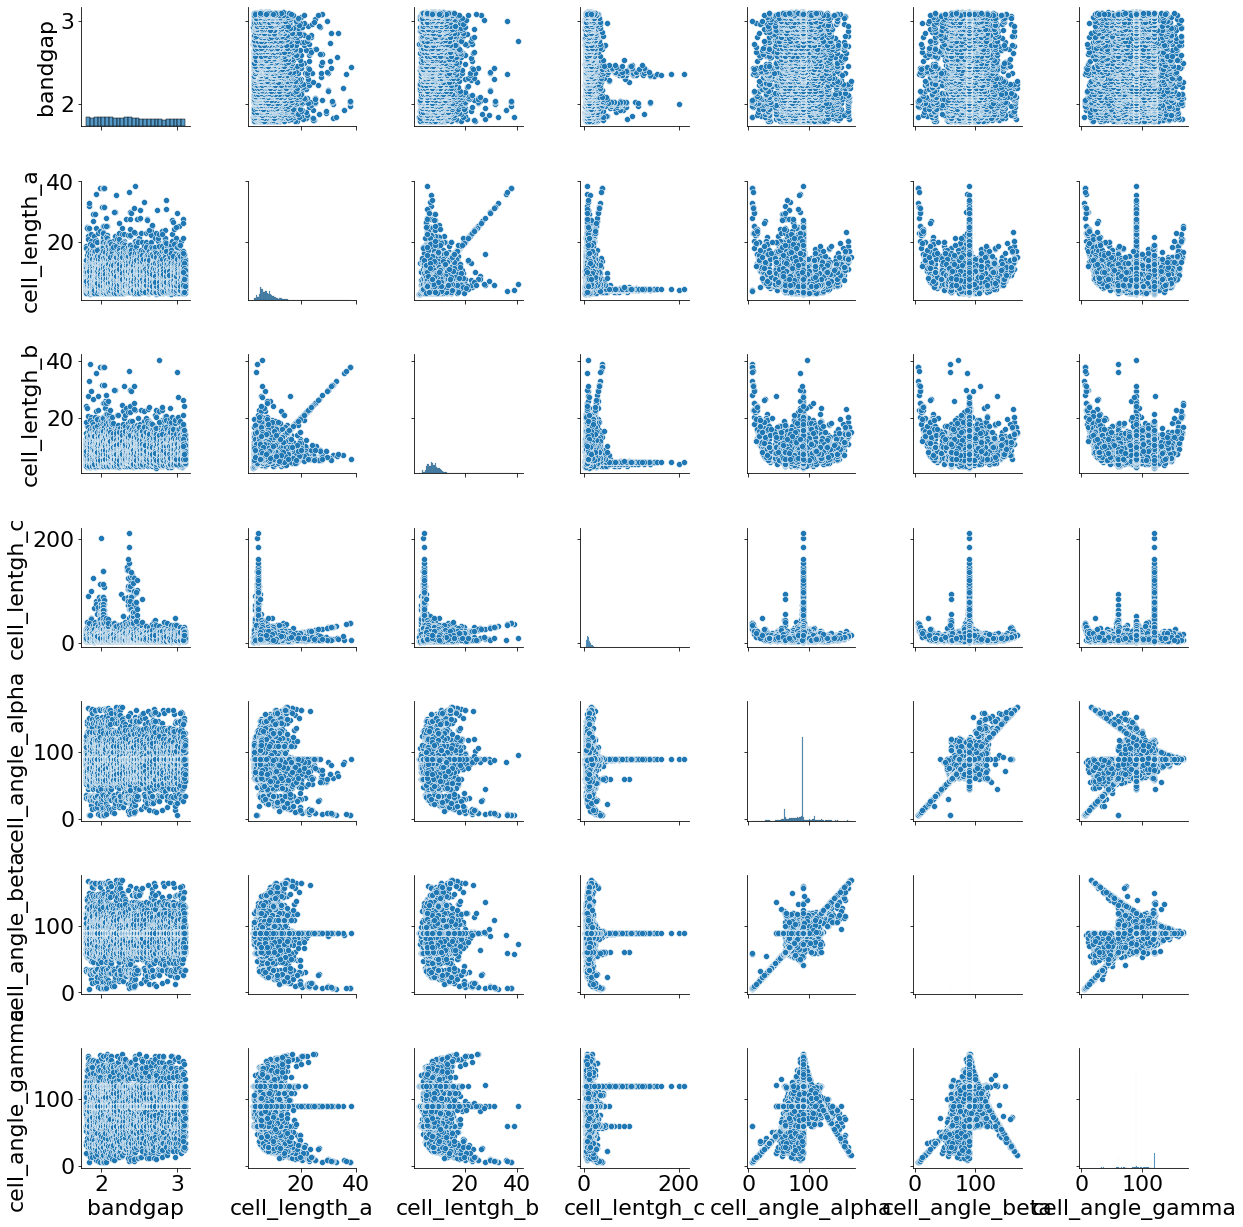

In [4]:
sns.pairplot(data)

* From the plot above, we can clearly see the correlation between each feature. It is obvious that the scatters of `bandgap` and other features are dispersed. With several attempts of creating different types of machine-learning model to predict the `bandgap` using those crystal parameters, we can confirm that there is no correlation between `bandgap` and crystal parameters. Therefore, we decide to try train a neural network model using `cell angle` and `cell length` to predict one of the crystal parameters.

In [7]:
X = data[['cell_lentgh_b', 'cell_lentgh_c', 'cell_angle_alpha', 'cell_angle_beta', 'cell_angle_gamma']].values
Y = data[['cell_length_a']].values

In [8]:
# create test/train split from the data above and  keep 20% for testing
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                         test_size=0.20, 
                                                         random_state=seed)

# train a standard scaler model to apply it to the train set and test set
X_train_scaler = StandardScaler().fit(X_train_pn)
X_train = X_train_scaler.transform(X_train_pn)
X_test = X_train_scaler.transform(X_test_pn)

### Create a neural network model with 4 layers

In [9]:
def neural_network_model(n1, n2, n3, act1, act2, act3, lr):
    """
    activation: 'relu', 'sigmoid', 'linear', 'tanh', 'selu', 'elu'
    """
    model = Sequential()
    model.add(Dense(n1, input_dim=5, kernel_initializer='normal', activation=act1))
    model.add(Dense(n2, kernel_initializer='normal', activation=act2))
    model.add(Dense(n3, kernel_initializer='normal', activation=act3))
    model.add(Dense(1, kernel_initializer='normal'))
    
    opt = tensorflow.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

* Try the model with default parameters

In [8]:
np.random.seed(seed)
# Create the NN framework
estimator = KerasRegressor(build_fn=neural_network_model, 
                               n1=32, n2=64, n3=64,
                               act1="relu", act2="relu", act3="sigmoid", 
                               epochs=1500, batch_size=1000, verbose=1, lr=0.01)
history = estimator.fit(X_train, y_train, validation_split=0.30, epochs=150, 
                            batch_size=1000, verbose=1)
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

2022-03-12 16:06:57.855735: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-12 16:06:57.857579: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-12 16:06:57.864294: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-12 16:06:58.408847: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-12 16:06:58.413202: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3193885000 Hz


Epoch 1/150
10/10 [==============================] - 3s 228ms/step - loss: 56.0212 - val_loss: 17.0820
Epoch 2/150
10/10 [==============================] - 1s 52ms/step - loss: 13.3299 - val_loss: 13.6929
Epoch 3/150
10/10 [==============================] - 0s 42ms/step - loss: 13.0633 - val_loss: 10.8533
Epoch 4/150
10/10 [==============================] - 0s 52ms/step - loss: 10.6630 - val_loss: 10.9131
Epoch 5/150
10/10 [==============================] - 0s 45ms/step - loss: 9.8985 - val_loss: 10.6270
Epoch 6/150
10/10 [==============================] - 0s 40ms/step - loss: 10.5376 - val_loss: 10.3227
Epoch 7/150
10/10 [==============================] - 1s 59ms/step - loss: 9.2826 - val_loss: 9.6901
Epoch 8/150
10/10 [==============================] - 0s 40ms/step - loss: 8.3234 - val_loss: 8.9620
Epoch 9/150
10/10 [==============================] - 0s 32ms/step - loss: 7.4731 - val_loss: 8.4534
Epoch 10/150
10/10 [==============================] - 1s 60ms/step - loss: 7.9273 - val_

10/10 [==============================] - 0s 36ms/step - loss: 4.8728 - val_loss: 5.1440
Epoch 83/150
10/10 [==============================] - 0s 28ms/step - loss: 4.7680 - val_loss: 5.1269
Epoch 84/150
10/10 [==============================] - 0s 39ms/step - loss: 4.6942 - val_loss: 5.3166
Epoch 85/150
10/10 [==============================] - 0s 42ms/step - loss: 4.9551 - val_loss: 5.1912
Epoch 86/150
10/10 [==============================] - 0s 52ms/step - loss: 5.0213 - val_loss: 5.1415
Epoch 87/150
10/10 [==============================] - 0s 25ms/step - loss: 4.6269 - val_loss: 5.0392
Epoch 88/150
10/10 [==============================] - 0s 29ms/step - loss: 5.0839 - val_loss: 5.0510
Epoch 89/150
10/10 [==============================] - 0s 50ms/step - loss: 4.7944 - val_loss: 5.1204
Epoch 90/150
10/10 [==============================] - 0s 35ms/step - loss: 4.7852 - val_loss: 5.2435
Epoch 91/150
10/10 [==============================] - 0s 45ms/step - loss: 4.8391 - val_loss: 5.0391
Epo

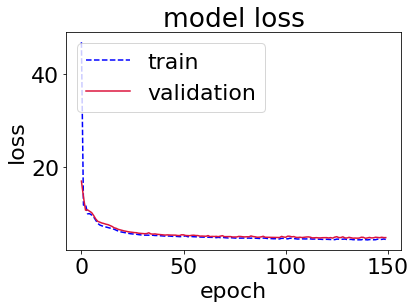

In [9]:
# Plot of model loss
plt.plot(history.history['loss'], '--', c='b')
plt.plot(history.history['val_loss'], c='crimson')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Use hyperparameter tuning to optimize the parameters

In [12]:
def nn_mse(n1, n2, n3, act1, act2, act3, lr):
    estimator = KerasRegressor(build_fn=neural_network_model, 
                               n1=n1, n2=n2, n3=n3,
                               act1=act1, act2=act2, act3=act3, 
                               epochs=150, batch_size=100, verbose=0, lr=lr)
    history = estimator.fit(X_train, y_train, validation_split=0.30, epochs=150, 
                            batch_size=100, verbose=0)
    
    return history.history['val_loss'][-1]

In [13]:
def objective(trial):
    # define hyperparameter space
    n1 = trial.suggest_categorical('n1', [2, 8, 16, 64, 128, 256, 512])
    n2 = trial.suggest_categorical('n2', [2, 8, 16, 64, 128, 256, 512])
    n3 = trial.suggest_categorical('n3', [2, 8, 16, 64, 128, 256, 512])
    act1 = trial.suggest_categorical('act1', ['relu', 'sigmoid', 'linear', 'tanh', 'selu', 'elu'])
    act2 = trial.suggest_categorical('act2', ['relu', 'sigmoid', 'linear', 'tanh', 'selu', 'elu'])
    act3 = trial.suggest_categorical('act3', ['relu', 'sigmoid', 'linear', 'tanh', 'selu', 'elu'])
    lr = trial.suggest_categorical('lr', [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0])
    
    # get the score for the hyperparameters chosen
    val_mse = nn_mse(n1, n2, n3, act1, act2, act3, lr)
    
    return val_mse

# Create a study with the tep sampler
study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='minimize')
# run the study.
# this uses TPE to try different hyperparameters (in this case x and y)
# and searches for the best ones
study.optimize(objective, n_trials=5000)
# get the results as dataframe
results = study.trials_dataframe()

[I 2022-03-12 16:13:38,812] A new study created in memory with name: no-name-50a2e5ff-34ff-4c3c-8789-5d49d507f22e
[I 2022-03-12 16:22:42,133] Trial 0 finished with value: 4.873178005218506 and parameters: {'n1': 512, 'n2': 256, 'n3': 64, 'act1': 'elu', 'act2': 'elu', 'act3': 'tanh', 'lr': 0.001}. Best is trial 0 with value: 4.873178005218506.
[I 2022-03-12 16:24:19,549] Trial 1 finished with value: 5.2422637939453125 and parameters: {'n1': 16, 'n2': 8, 'n3': 128, 'act1': 'linear', 'act2': 'elu', 'act3': 'linear', 'lr': 0.01}. Best is trial 0 with value: 4.873178005218506.
[I 2022-03-12 16:27:08,861] Trial 2 finished with value: 5.0836710929870605 and parameters: {'n1': 64, 'n2': 256, 'n3': 16, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'tanh', 'lr': 0.001}. Best is trial 0 with value: 4.873178005218506.
[I 2022-03-12 16:30:58,710] Trial 3 finished with value: 11.094934463500977 and parameters: {'n1': 16, 'n2': 8, 'n3': 64, 'act1': 'sigmoid', 'act2': 'selu', 'act3': 'sigmoid', 'lr': 1.0

[I 2022-03-12 17:25:09,432] Trial 33 finished with value: 4.796390533447266 and parameters: {'n1': 64, 'n2': 512, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'elu', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 17:28:20,075] Trial 34 finished with value: 4.635737895965576 and parameters: {'n1': 512, 'n2': 512, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'elu', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 17:30:36,468] Trial 35 finished with value: 4.899636268615723 and parameters: {'n1': 16, 'n2': 512, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'elu', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 17:32:01,905] Trial 36 finished with value: 4.961430072784424 and parameters: {'n1': 256, 'n2': 8, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'elu', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 17:33:59,243] Trial 37 finished with value: 11.018

[I 2022-03-12 19:00:08,270] Trial 67 finished with value: 4.971749782562256 and parameters: {'n1': 8, 'n2': 128, 'n3': 128, 'act1': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 19:02:07,128] Trial 68 finished with value: 4.734038829803467 and parameters: {'n1': 128, 'n2': 512, 'n3': 16, 'act1': 'relu', 'act2': 'elu', 'act3': 'elu', 'lr': 0.01}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 19:04:55,113] Trial 69 finished with value: 4.670843601226807 and parameters: {'n1': 512, 'n2': 256, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 19:06:47,567] Trial 70 finished with value: 6.154752254486084 and parameters: {'n1': 256, 'n2': 16, 'n3': 512, 'act1': 'selu', 'act2': 'relu', 'act3': 'elu', 'lr': 1e-05}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 19:10:18,755] Trial 71 finished with value: 4.7196474

[I 2022-03-12 20:46:26,812] Trial 101 finished with value: 4.757640361785889 and parameters: {'n1': 512, 'n2': 256, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 20:49:22,212] Trial 102 finished with value: 4.773909568786621 and parameters: {'n1': 512, 'n2': 256, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 20:52:07,642] Trial 103 finished with value: 4.700969696044922 and parameters: {'n1': 512, 'n2': 256, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 20:54:42,804] Trial 104 finished with value: 4.691694259643555 and parameters: {'n1': 512, 'n2': 256, 'n3': 512, 'act1': 'relu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0001}. Best is trial 28 with value: 4.59635066986084.
[I 2022-03-12 20:56:12,507] Trial 105 finished with 

[I 2022-03-12 22:09:20,943] Trial 134 finished with value: 4.690895080566406 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'relu', 'act2': 'selu', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 22:10:51,274] Trial 135 finished with value: 4.648436546325684 and parameters: {'n1': 512, 'n2': 64, 'n3': 128, 'act1': 'relu', 'act2': 'selu', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 22:12:17,715] Trial 136 finished with value: 4.7039618492126465 and parameters: {'n1': 512, 'n2': 64, 'n3': 128, 'act1': 'relu', 'act2': 'selu', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 22:13:20,583] Trial 137 finished with value: 5.09813117980957 and parameters: {'n1': 16, 'n2': 64, 'n3': 128, 'act1': 'elu', 'act2': 'selu', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 22:15:05,855] Trial 138 finished with v

[I 2022-03-12 23:44:14,810] Trial 167 finished with value: 4.618671417236328 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'relu', 'act2': 'tanh', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 23:47:53,262] Trial 168 finished with value: 4.575185298919678 and parameters: {'n1': 512, 'n2': 512, 'n3': 8, 'act1': 'relu', 'act2': 'tanh', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 23:50:52,128] Trial 169 finished with value: 4.595139980316162 and parameters: {'n1': 512, 'n2': 512, 'n3': 64, 'act1': 'elu', 'act2': 'tanh', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 23:54:11,287] Trial 170 finished with value: 4.616897106170654 and parameters: {'n1': 512, 'n2': 512, 'n3': 8, 'act1': 'elu', 'act2': 'tanh', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-12 23:56:39,653] Trial 171 finished with val

[I 2022-03-13 01:06:12,195] Trial 200 finished with value: 4.715721607208252 and parameters: {'n1': 512, 'n2': 128, 'n3': 64, 'act1': 'relu', 'act2': 'selu', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-13 01:08:32,112] Trial 201 finished with value: 4.727940559387207 and parameters: {'n1': 512, 'n2': 512, 'n3': 64, 'act1': 'relu', 'act2': 'elu', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-13 01:11:17,910] Trial 202 finished with value: 4.738496780395508 and parameters: {'n1': 512, 'n2': 512, 'n3': 64, 'act1': 'relu', 'act2': 'tanh', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-13 01:13:25,332] Trial 203 finished with value: 4.785824775695801 and parameters: {'n1': 512, 'n2': 512, 'n3': 64, 'act1': 'relu', 'act2': 'elu', 'act3': 'elu', 'lr': 0.001}. Best is trial 122 with value: 4.5500359535217285.
[I 2022-03-13 01:15:31,546] Trial 204 finished with va

[I 2022-03-13 03:19:07,702] Trial 233 finished with value: 4.598330497741699 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'selu', 'act2': 'sigmoid', 'act3': 'elu', 'lr': 0.001}. Best is trial 212 with value: 4.5339131355285645.
[I 2022-03-13 03:21:25,782] Trial 234 finished with value: 4.540748119354248 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'relu', 'act2': 'sigmoid', 'act3': 'elu', 'lr': 0.001}. Best is trial 212 with value: 4.5339131355285645.
[I 2022-03-13 03:23:45,213] Trial 235 finished with value: 4.790652275085449 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'relu', 'act2': 'sigmoid', 'act3': 'elu', 'lr': 0.001}. Best is trial 212 with value: 4.5339131355285645.
[I 2022-03-13 03:26:59,150] Trial 236 finished with value: 4.839016914367676 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'relu', 'act2': 'sigmoid', 'act3': 'elu', 'lr': 0.01}. Best is trial 212 with value: 4.5339131355285645.
[I 2022-03-13 03:29:17,427] Trial 237

[I 2022-03-13 04:36:17,823] Trial 265 finished with value: 5.135517597198486 and parameters: {'n1': 16, 'n2': 512, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 243 with value: 4.492733478546143.
[I 2022-03-13 04:39:19,083] Trial 266 finished with value: 4.563352108001709 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 243 with value: 4.492733478546143.
[I 2022-03-13 04:41:45,211] Trial 267 finished with value: 4.606751441955566 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 243 with value: 4.492733478546143.
[I 2022-03-13 04:44:32,052] Trial 268 finished with value: 4.580149173736572 and parameters: {'n1': 512, 'n2': 512, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 243 with value: 4.492733478546143.
[I 2022-03-13 04:45:49,63

[I 2022-03-13 05:50:08,562] Trial 297 finished with value: 4.9707136154174805 and parameters: {'n1': 256, 'n2': 8, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 05:53:07,417] Trial 298 finished with value: 4.609661102294922 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 05:54:53,805] Trial 299 finished with value: 8.975436210632324 and parameters: {'n1': 8, 'n2': 512, 'n3': 8, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.01}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 05:56:36,526] Trial 300 finished with value: 4.787647724151611 and parameters: {'n1': 128, 'n2': 512, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 05:57:43,607] Tr

[I 2022-03-13 06:52:03,152] Trial 329 finished with value: 6.433855056762695 and parameters: {'n1': 256, 'n2': 2, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 06:54:38,074] Trial 330 finished with value: 4.578096389770508 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 06:56:24,996] Trial 331 finished with value: 14.589173316955566 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 1.0}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 06:58:23,164] Trial 332 finished with value: 4.723364353179932 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 272 with value: 4.478343963623047.
[I 2022-03-13 07:00

[I 2022-03-13 07:54:13,808] Trial 361 finished with value: 4.924945831298828 and parameters: {'n1': 256, 'n2': 64, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 07:56:26,324] Trial 362 finished with value: 4.569615364074707 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 07:57:30,031] Trial 363 finished with value: 6.472105026245117 and parameters: {'n1': 256, 'n2': 2, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 07:59:16,002] Trial 364 finished with value: 4.53796911239624 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 08:01:29,0

[I 2022-03-13 08:51:34,717] Trial 393 finished with value: 10.74034309387207 and parameters: {'n1': 64, 'n2': 512, 'n3': 128, 'act1': 'sigmoid', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 1e-05}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 08:53:19,625] Trial 394 finished with value: 4.462736129760742 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 08:55:10,876] Trial 395 finished with value: 4.620116233825684 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'tanh', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 08:56:46,839] Trial 396 finished with value: 4.765101909637451 and parameters: {'n1': 256, 'n2': 512, 'n3': 16, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 08:58:50,8

[I 2022-03-13 09:46:55,451] Trial 425 finished with value: 11.092235565185547 and parameters: {'n1': 256, 'n2': 2, 'n3': 128, 'act1': 'sigmoid', 'act2': 'sigmoid', 'act3': 'linear', 'lr': 0.1}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 09:48:58,820] Trial 426 finished with value: 4.560977458953857 and parameters: {'n1': 256, 'n2': 512, 'n3': 256, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'tanh', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 09:50:30,168] Trial 427 finished with value: 4.686022758483887 and parameters: {'n1': 64, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 09:52:15,342] Trial 428 finished with value: 4.559203624725342 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 09:53:48,268]

[I 2022-03-13 10:38:51,021] Trial 457 finished with value: 4.543810844421387 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 10:40:40,585] Trial 458 finished with value: 4.528189182281494 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 10:42:03,526] Trial 459 finished with value: 5.064405918121338 and parameters: {'n1': 8, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 10:43:53,043] Trial 460 finished with value: 4.6074323654174805 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 10:45:1

[I 2022-03-13 11:30:56,891] Trial 489 finished with value: 4.79086971282959 and parameters: {'n1': 256, 'n2': 256, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 11:32:44,902] Trial 490 finished with value: 4.6909942626953125 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'elu', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 11:34:08,788] Trial 491 finished with value: 5.854808330535889 and parameters: {'n1': 8, 'n2': 512, 'n3': 128, 'act1': 'sigmoid', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 11:35:54,603] Trial 492 finished with value: 4.504863739013672 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 11:37:47,20

[I 2022-03-13 12:26:04,634] Trial 521 finished with value: 4.5905866622924805 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 12:27:35,335] Trial 522 finished with value: 6.0258073806762695 and parameters: {'n1': 2, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 12:29:45,525] Trial 523 finished with value: 5.039221286773682 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.01}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 12:31:34,457] Trial 524 finished with value: 5.509951591491699 and parameters: {'n1': 256, 'n2': 512, 'n3': 2, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 12:32:53,

[I 2022-03-13 13:24:09,442] Trial 553 finished with value: 4.544236183166504 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 13:26:32,509] Trial 554 finished with value: 10.754632949829102 and parameters: {'n1': 256, 'n2': 512, 'n3': 2, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.01}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 13:28:42,412] Trial 555 finished with value: 4.582980155944824 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'relu', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 13:30:02,497] Trial 556 finished with value: 16.86726951599121 and parameters: {'n1': 16, 'n2': 128, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 1.0}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 13:31:52,637] 

[I 2022-03-13 14:32:06,649] Trial 585 finished with value: 5.3434038162231445 and parameters: {'n1': 256, 'n2': 128, 'n3': 2, 'act1': 'elu', 'act2': 'linear', 'act3': 'linear', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 14:34:02,858] Trial 586 finished with value: 4.496711730957031 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 14:36:38,470] Trial 587 finished with value: 4.6375627517700195 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'tanh', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 14:38:56,937] Trial 588 finished with value: 8.147132873535156 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 1e-05}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 14:41:09,632]

[I 2022-03-13 15:45:13,638] Trial 618 finished with value: 4.557299613952637 and parameters: {'n1': 128, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 15:46:57,751] Trial 619 finished with value: 5.9742841720581055 and parameters: {'n1': 8, 'n2': 512, 'n3': 128, 'act1': 'sigmoid', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 15:48:28,505] Trial 620 finished with value: 7.798092365264893 and parameters: {'n1': 256, 'n2': 16, 'n3': 16, 'act1': 'linear', 'act2': 'tanh', 'act3': 'sigmoid', 'lr': 0.1}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 15:50:45,829] Trial 621 finished with value: 4.496708869934082 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 15:52:27,148]

[I 2022-03-13 17:11:17,814] Trial 651 finished with value: 4.498956203460693 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 17:13:23,523] Trial 652 finished with value: 4.485657215118408 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 17:15:55,402] Trial 653 finished with value: 4.55141544342041 and parameters: {'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 17:17:46,792] Trial 654 finished with value: 4.605864524841309 and parameters: {'n1': 256, 'n2': 512, 'n3': 64, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001}. Best is trial 346 with value: 4.45842170715332.
[I 2022-03-13 17:20:07

KeyboardInterrupt: 

* After 665 iterations, we obtained the optimal parameters: `'n1': 256, 'n2': 512, 'n3': 128, 'act1': 'linear', 'act2': 'sigmoid', 'act3': 'sigmoid', 'lr': 0.001`. With this set of parameters, we can train an optimal neural network model.

In [10]:
np.random.seed(seed)
# Create the NN framework
estimator_opt = KerasRegressor(build_fn=neural_network_model, 
                               n1=256, n2=512, n3=128,
                               act1="linear", act2="sigmoid", act3="sigmoid", 
                               epochs=150, batch_size=100, verbose=1, lr=0.001)
history_opt = estimator_opt.fit(X_train, y_train, validation_split=0.30, epochs=150, 
                            batch_size=100, verbose=1)
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history_opt.history['loss'][-1], history_opt.history['val_loss'][-1]))

2022-03-13 20:19:40.063643: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-13 20:19:40.065773: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-13 20:19:40.074319: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-13 20:19:40.163571: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-13 20:19:40.165635: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3193885000 Hz


Epoch 1/150
92/92 [==============================] - 3s 27ms/step - loss: 29.4930 - val_loss: 10.2378
Epoch 2/150
92/92 [==============================] - 1s 15ms/step - loss: 9.5739 - val_loss: 8.6014
Epoch 3/150
92/92 [==============================] - 2s 25ms/step - loss: 7.4645 - val_loss: 8.2790
Epoch 4/150
92/92 [==============================] - 2s 23ms/step - loss: 7.5640 - val_loss: 8.1247
Epoch 5/150
92/92 [==============================] - 1s 11ms/step - loss: 7.8957 - val_loss: 7.9953
Epoch 6/150
92/92 [==============================] - 1s 12ms/step - loss: 7.1170 - val_loss: 7.9100
Epoch 7/150
92/92 [==============================] - 1s 13ms/step - loss: 7.6103 - val_loss: 7.8173
Epoch 8/150
92/92 [==============================] - 1s 16ms/step - loss: 7.0023 - val_loss: 7.5243
Epoch 9/150
92/92 [==============================] - 2s 22ms/step - loss: 7.4444 - val_loss: 7.3069
Epoch 10/150
92/92 [==============================] - 1s 11ms/step - loss: 6.6008 - val_loss: 7.14

92/92 [==============================] - 2s 27ms/step - loss: 4.1695 - val_loss: 4.6564
Epoch 83/150
92/92 [==============================] - 1s 13ms/step - loss: 4.1724 - val_loss: 4.6247
Epoch 84/150
92/92 [==============================] - 1s 11ms/step - loss: 4.7490 - val_loss: 4.6226
Epoch 85/150
92/92 [==============================] - 1s 11ms/step - loss: 3.9807 - val_loss: 4.6037
Epoch 86/150
92/92 [==============================] - 1s 12ms/step - loss: 4.1600 - val_loss: 4.6486
Epoch 87/150
92/92 [==============================] - 1s 10ms/step - loss: 4.4279 - val_loss: 4.6181
Epoch 88/150
92/92 [==============================] - 1s 12ms/step - loss: 4.3335 - val_loss: 4.5710
Epoch 89/150
92/92 [==============================] - 1s 13ms/step - loss: 4.2595 - val_loss: 4.6323
Epoch 90/150
92/92 [==============================] - 1s 11ms/step - loss: 4.1268 - val_loss: 4.5598
Epoch 91/150
92/92 [==============================] - 2s 21ms/step - loss: 4.0687 - val_loss: 4.6440
Epo

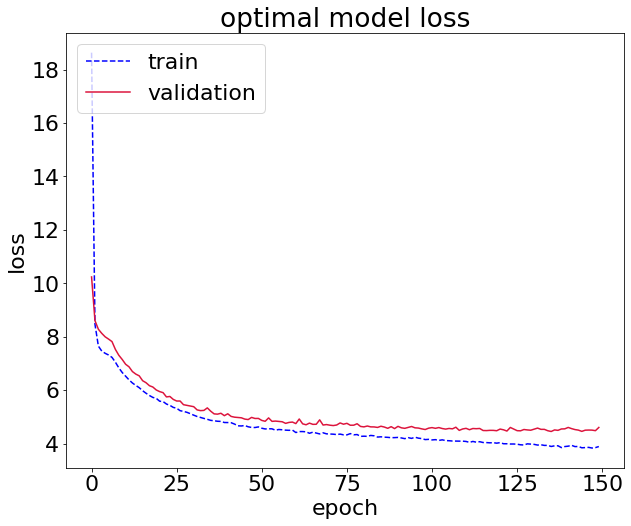

In [11]:
# Plot of model loss
plt.figure(figsize=(10,8))
plt.plot(history_opt.history['loss'], '--', c='b')
plt.plot(history_opt.history['val_loss'], c='crimson')
plt.title('optimal model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

33/33 [==============================] - 1s 25ms/step


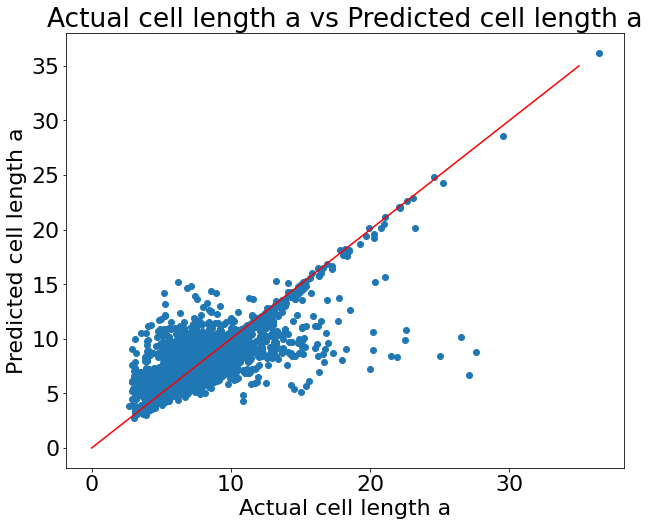

In [12]:
y_predict = estimator_opt.predict(X_test)
# Plot of y_predict and y_test
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,35), np.linspace(0, 35), color='r')
plt.scatter(y_test, y_predict)
plt.title('Actual cell length a vs Predicted cell length a')
plt.xlabel('Actual cell length a')
plt.ylabel('Predicted cell length a')
plt.show()